In [1]:
import nflfastpy as npy
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
import pandas as pd
import numpy as np
import urllib
from PIL import Image

### Load team color and logo data

In [2]:
team_logo_df = npy.load_team_logo_data()

### Load 2021 play-by-play data

In [3]:
df = npy.load_pbp_data(2021)

### Filter to penalties that occured on 3rd down or 4th down

In [6]:
df_penalty = df[(df["down"].isin([3, 4])) & (df["penalty"] == 1)].copy()

In [8]:
df_penalty[["posteam", "defteam", "down", "ydstogo", "penalty", "penalty_team", "penalty_type", "penalty_yards", "yards_gained", "first_down"]]

,posteam,defteam,down,ydstogo,penalty,penalty_team,penalty_type,penalty_yards,yards_gained,first_down
47,ARI,TEN,3.0,2,1.0,TEN,Defensive Pass Interference,17.0,0.0,1.0
176,ARI,TEN,4.0,7,1.0,TEN,Offensive Holding,2.0,0.0,0.0
229,LV,BAL,3.0,4,1.0,LV,False Start,6.0,0.0,0.0
249,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,9.0,0.0,1.0
271,LV,BAL,3.0,3,1.0,BAL,Unnecessary Roughness,15.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
34694,PIT,MIN,3.0,6,1.0,MIN,Defensive Offside,5.0,0.0,0.0
34695,PIT,MIN,3.0,1,1.0,PIT,False Start,5.0,0.0,0.0
34734,PIT,MIN,3.0,9,1.0,MIN,Neutral Zone Infraction,5.0,0.0,0.0
34739,PIT,MIN,3.0,8,1.0,MIN,Defensive Pass Interference,7.0,0.0,1.0


### Filter where the offending team was on defense

In [9]:
df_penalty = df_penalty[df_penalty["defteam"] == df_penalty["penalty_team"]].copy()

In [10]:
df_penalty[["posteam", "defteam", "down", "ydstogo", "penalty", "penalty_team", "penalty_type", "penalty_yards", "yards_gained", "first_down"]]

,posteam,defteam,down,ydstogo,penalty,penalty_team,penalty_type,penalty_yards,yards_gained,first_down
47,ARI,TEN,3.0,2,1.0,TEN,Defensive Pass Interference,17.0,0.0,1.0
176,ARI,TEN,4.0,7,1.0,TEN,Offensive Holding,2.0,0.0,0.0
249,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,9.0,0.0,1.0
271,LV,BAL,3.0,3,1.0,BAL,Unnecessary Roughness,15.0,0.0,1.0
299,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,32.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
34617,PIT,MIN,4.0,4,1.0,MIN,Defensive Holding,5.0,5.0,1.0
34645,PIT,MIN,4.0,16,1.0,MIN,Offensive Holding,10.0,0.0,0.0
34694,PIT,MIN,3.0,6,1.0,MIN,Defensive Offside,5.0,0.0,0.0
34734,PIT,MIN,3.0,9,1.0,MIN,Neutral Zone Infraction,5.0,0.0,0.0


### Find where the yards gained were less than the yards to go but team got a first down

In [11]:
df_penalty = df_penalty[(df_penalty["yards_gained"] < df_penalty["ydstogo"]) & (df_penalty["first_down"] == 1)].copy()

In [23]:
df_penalty["final_pts"] = df["fixed_drive_result"].apply(lambda x: 6 if x == "Touchdown" else 3 if x == "Field goal" else 0)

In [24]:
df_penalty[["posteam", "defteam", "down", "ydstogo", "penalty", "penalty_team", "penalty_type", "penalty_yards", "yards_gained", "first_down", "fixed_drive_result", "final_pts"]]

,posteam,defteam,down,ydstogo,penalty,penalty_team,penalty_type,penalty_yards,yards_gained,first_down,fixed_drive_result,final_pts
47,ARI,TEN,3.0,2,1.0,TEN,Defensive Pass Interference,17.0,0.0,1.0,Touchdown,6
249,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,9.0,0.0,1.0,Touchdown,6
271,LV,BAL,3.0,3,1.0,BAL,Unnecessary Roughness,15.0,0.0,1.0,Field goal,3
299,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,32.0,0.0,1.0,Turnover on downs,0
958,NYG,DEN,3.0,7,1.0,DEN,Defensive Pass Interference,5.0,0.0,1.0,Touchdown,6
...,...,...,...,...,...,...,...,...,...,...,...,...
34015,PHI,NYJ,4.0,4,1.0,NYJ,Encroachment,5.0,0.0,1.0,Field goal,3
34218,SEA,SF,3.0,4,1.0,SF,Unnecessary Roughness,15.0,2.0,1.0,Turnover,0
34327,ATL,TB,3.0,14,1.0,TB,Defensive Holding,5.0,2.0,1.0,Punt,0
34495,WAS,LV,3.0,9,1.0,LV,Roughing the Passer,15.0,0.0,1.0,Punt,0


In [26]:
df_agg = (
    df_penalty.groupby("posteam", as_index=False)
    .agg({"first_down": "size", "penalty_yards": "sum", "final_pts": "sum"})
)

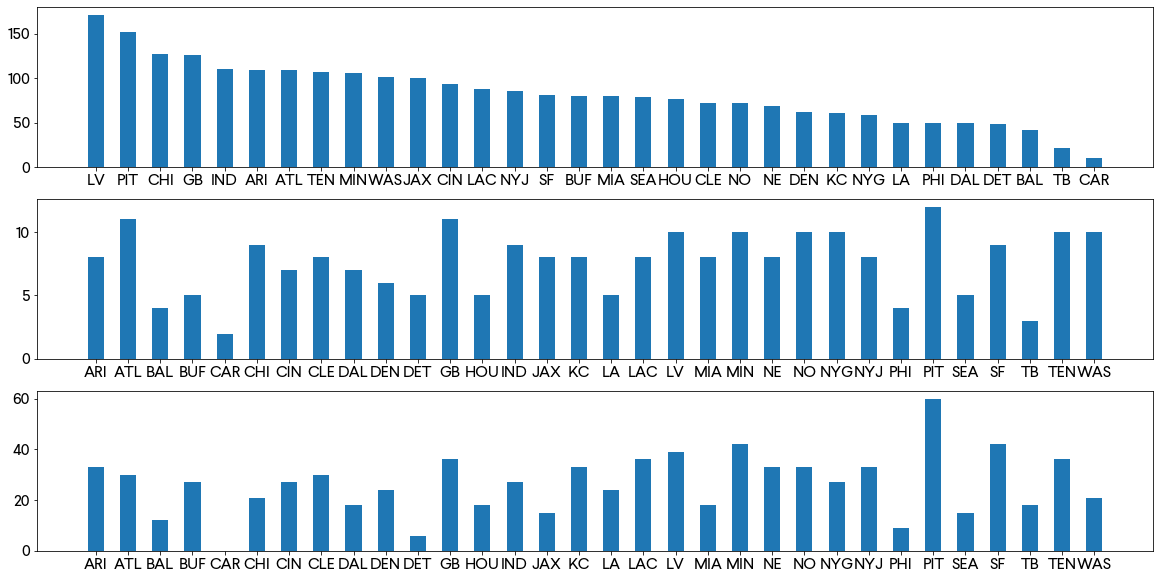

In [27]:
plt.rcParams["font.family"] = "Larsseit"
plt.rcParams["font.size"] = 16

fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(nrows=3, ncols=2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])

ax1.bar(range(df_agg.shape[0]), df_agg.sort_values("penalty_yards", ascending=False)["penalty_yards"], width=0.5, tick_label=df_agg.sort_values("penalty_yards", ascending=False)["posteam"])
ax2.bar(range(df_agg.shape[0]), df_agg["first_down"], width=0.5, tick_label=df_agg["posteam"])
ax3.bar(range(df_agg.shape[0]), df_agg["final_pts"], width=0.5, tick_label=df_agg["posteam"])

plt.show()

In [30]:
df_penalty.groupby("penalty_type", as_index=False).size().sort_values("size", ascending=False)

,penalty_type,size
2,Defensive Pass Interference,102
0,Defensive Holding,43
14,Roughing the Passer,26
18,Unnecessary Roughness,12
1,Defensive Offside,11
12,Neutral Zone Infraction,9
5,Encroachment,7
10,Illegal Use of Hands,7
13,Roughing the Kicker,6
11,Leverage,4


In [48]:
df_penalty[df_penalty["penalty_type"] == "Defensive Too Many Men on Field"].iloc[0].desc

'(3:11) (Shotgun) PENALTY on CLE, Defensive Too Many Men on Field, 5 yards, enforced at BAL 33 - No Play.'

In [33]:
for col in df.columns:
    print(col)

play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa


### Get Deebo Samuel rushing and receiving data

In [4]:
df_deebo = df[
    (df["rusher_player_name"] == "D.Samuel") | 
    (df["receiver_player_name"] == "D.Samuel") &
    (df["incomplete_pass"] == 0) &
    (df["interception"] == 0)
].copy()

In [5]:
df_deebo

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
2759,1026,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,2.235091,0.363803,5.511636,3.0,1.000000,1.000000,0.718925,28.107512
2760,1054,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,0.554130,0.430087,3.992669,2.0,0.982975,0.277121,0.496457,50.354278
2777,1443,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,1.370228,0.291785,4.118719,2.0,1.000000,1.000000,0.439073,56.092697
2779,1488,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,1,1,1.389195,1.066870,2.576346,2.0,0.751286,0.426213,0.707250,29.275018
2796,1876,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,1,1,1.757783,0.640567,10.739427,9.0,0.619697,0.259430,0.813241,18.675858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30982,1190,2021_12_MIN_SF,2021112809,SF,MIN,REG,12,SF,home,MIN,...,1,0,-0.275338,NaN,NaN,NaN,NaN,NaN,0.507857,-50.785685
31021,2119,2021_12_MIN_SF,2021112809,SF,MIN,REG,12,SF,home,MIN,...,1,0,3.180161,NaN,NaN,NaN,NaN,NaN,0.492781,-49.278128
31024,2200,2021_12_MIN_SF,2021112809,SF,MIN,REG,12,SF,home,MIN,...,0,0,1.106602,NaN,NaN,NaN,NaN,NaN,0.486614,-48.661420
31048,2735,2021_12_MIN_SF,2021112809,SF,MIN,REG,12,SF,home,MIN,...,0,0,0.769757,0.369136,4.269026,2.0,0.997732,0.458717,0.487190,51.280987


### Total rushing yards

In [6]:
print(f"Deebo Samuel rushing yards: {df_deebo['rushing_yards'].sum()}")

Deebo Samuel rushing yards: 203.0


### Total receiving yards

In [7]:
print(f"Deebo Samuel receiving yards: {df_deebo['receiving_yards'].sum()}")

Deebo Samuel receiving yards: 1006.0


In [8]:
df_deebo_agg = (
    df_deebo.groupby(["game_date", "week", "defteam"], as_index=False)
    .agg(
        {
            "rushing_yards": "sum",
            "air_yards": "sum",
            "yards_after_catch": "sum",
            "receiving_yards": "sum",
            "yards_gained": "sum",
            "touchdown": "sum"
        }
    )
)

In [9]:
df_deebo_agg["pace"] = 17 * df_deebo_agg["receiving_yards"].cumsum() / (df_deebo_agg.index + 1)

In [10]:
df_deebo_agg

,game_date,week,defteam,rushing_yards,air_yards,yards_after_catch,receiving_yards,yards_gained,touchdown,pace
0,2021-09-12,1,DET,0.0,80.0,109.0,189.0,189.0,1.0,3213.000000
1,2021-09-19,2,PHI,8.0,47.0,46.0,93.0,101.0,0.0,2397.000000
2,2021-09-26,3,GB,0.0,23.0,29.0,52.0,52.0,0.0,1892.666667
3,2021-10-03,4,SEA,1.0,70.0,86.0,156.0,157.0,2.0,2082.500000
4,2021-10-10,5,ARI,13.0,38.0,20.0,58.0,71.0,1.0,1863.200000
5,2021-10-24,7,IND,0.0,71.0,29.0,100.0,100.0,1.0,1836.000000
6,2021-10-31,8,CHI,0.0,74.0,97.0,171.0,171.0,0.0,1989.000000
7,2021-11-07,9,ARI,0.0,16.0,47.0,63.0,63.0,0.0,1874.250000
8,2021-11-15,10,LA,36.0,41.0,56.0,97.0,133.0,2.0,1849.222222
9,2021-11-21,11,JAX,79.0,9.0,6.0,15.0,94.0,1.0,1689.800000


### Get 49ers color data

In [11]:
sf_logo_data = team_logo_df[team_logo_df["team_abbr"] == "SF"].copy()

In [12]:
c1 = sf_logo_data["team_color"].values[0]
c2 = sf_logo_data["team_color2"].values[0]
c3 = sf_logo_data["team_color3"].values[0]
c4 = sf_logo_data["team_color4"].values[0]
bg = "#e4dbc5"

In [13]:
df_roster = npy.load_roster_data(2021)
df_deebo_metadata = df_roster[df_roster["full_name"] == "Deebo Samuel"].copy()

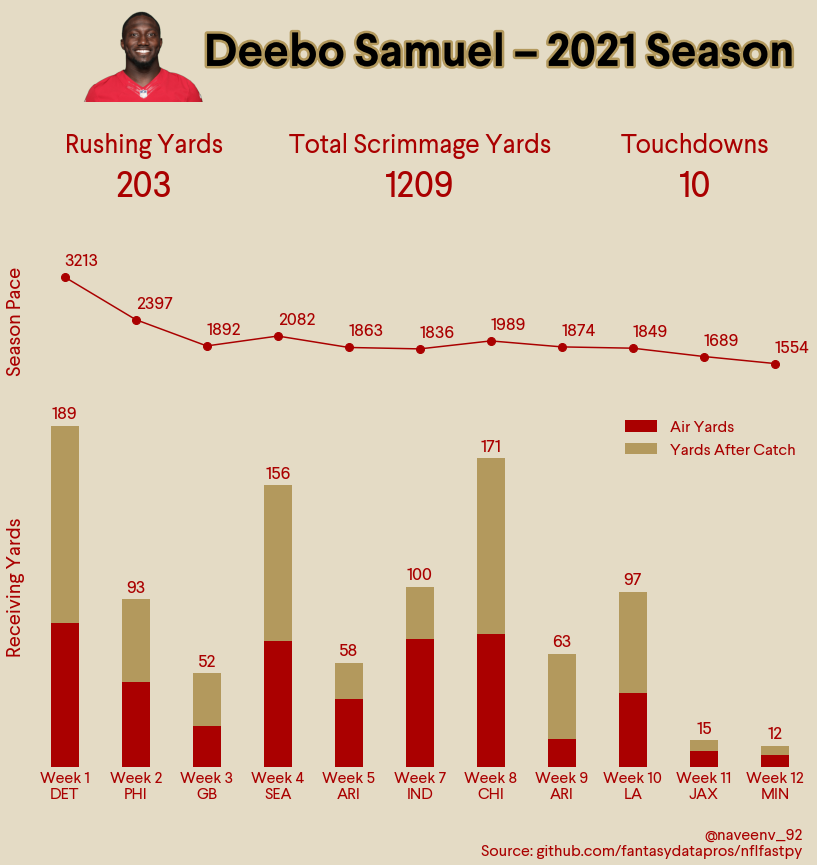

In [14]:
# Plot parameters
plt.rcParams["font.family"] = "Larsseit"
plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = 400
plt.rcParams["text.color"] = c1
plt.rcParams["axes.labelcolor"] = c1
plt.rcParams["xtick.color"] = c1
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.color"] = c1
plt.rcParams["ytick.major.size"] = 0

# Create figure and gridspec
fig = plt.figure(figsize=(14, 14), facecolor=bg)
gs = fig.add_gridspec(6, 3, hspace=0.4)

# Create axes objects and remove frame
ax1 = fig.add_subplot(gs[3:,:])
ax2 = fig.add_subplot(gs[2, :])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[0, 0])
ax7 = fig.add_subplot(gs[0, 1:])
ax1.set_frame_on(False)
ax2.set_frame_on(False)
ax3.set_frame_on(False)
ax4.set_frame_on(False)
ax5.set_frame_on(False)
ax6.set_frame_on(False)
ax7.set_frame_on(False)

# Metadata
xmin = -0.5
xmax = df_deebo_agg.shape[0] - 0.5
overall_pace = 17 * df_deebo_agg["receiving_yards"].sum() / df_deebo_agg.shape[0]

## Plot air yards and YAC
labels = [f"Week {i}\n{j}" for (i,j) in zip(df_deebo_agg["week"], df_deebo_agg["defteam"])] 
ax1.bar(range(df_deebo_agg.shape[0]), df_deebo_agg["air_yards"], width=0.4, color=c1, tick_label=labels, label="Air Yards")
ax1.bar(range(df_deebo_agg.shape[0]), df_deebo_agg["yards_after_catch"], width=0.4, bottom=df_deebo_agg["air_yards"], color=c2, label="Yards After Catch")

for i, yds in enumerate(df_deebo_agg["receiving_yards"]):
    ax1.text(i, yds + 2, int(yds), ha="center", va="bottom", size=18)

ax1.set_yticks([])

ax1.set(xlim=[xmin, xmax], ylim=[0, 200])
ax1.set_ylabel("Receiving Yards", size=20)
    
ax1.legend(frameon=False)

## Plot pace of receiving yards
#ax2.plot([xmin, xmax], [overall_pace, overall_pace], color=c1, linestyle="--")
ax2.plot(range(df_deebo_agg.shape[0]), df_deebo_agg["pace"], color=c1, marker="o", markersize=8)

for i, pace in enumerate(df_deebo_agg["pace"]):
    ax2.text(i, pace + 150, int(pace), ha="left", va="bottom", size=18)


ax2.set(xticks=[], yticks=[])
ax2.set_ylabel("Season Pace", size=20)

ax2.set(xlim=[xmin, xmax])

## Total Rushing Yards
ax3.text(0.5, 0.5, df_deebo_agg['rushing_yards'].sum().astype(int), ha="center", va="center", size=36)
ax3.text(0.5, 0.8, "Rushing Yards", ha="center", va="bottom", size=26)

ax3.set(xticks=[], yticks=[])

## Scrimmage Yards
ax4.text(0.5, 0.5, df_deebo_agg['yards_gained'].sum().astype(int), ha="center", va="center", size=36)
ax4.text(0.5, 0.8, "Total Scrimmage Yards", ha="center", va="bottom", size=26)

ax4.set(xticks=[], yticks=[])

## Total Touchdowns
ax5.text(0.5, 0.5, df_deebo_agg['touchdown'].sum().astype(int), ha="center", va="center", size=36)
ax5.text(0.5, 0.8, "Touchdowns", ha="center", va="bottom", size=26)

ax5.set(xticks=[], yticks=[])

## Headshot
urllib.request.urlretrieve(df_deebo_metadata["headshot_url"].values[0], "deebo.png")
img = Image.open("deebo.png")
ax6.imshow(img)

ax6.set(xticks=[], yticks=[])

## Title
ax7.text(-0.2, 0.5, "Deebo Samuel – 2021 Season", ha="left", va="center", color=c3, size=46, weight=800, path_effects=[patheffects.withStroke(linewidth=5, foreground=c2)])

ax7.set(xticks=[], yticks=[])

# Add source
ax1.text(0.99, -0.25, "@naveenv_92\nSource: github.com/fantasydatapros/nflfastpy", ha="right", va="bottom", size=16, transform=ax1.transAxes)

# Save and show figure
plt.savefig("deebo.png", dpi=500, bbox_inches="tight")
plt.show()